In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
rwq= pd.read_csv('winequality-red.csv',delimiter=';')
rwq.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
49,5.6,0.31,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2,5
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
1157,5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7
850,9.3,0.43,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5
1482,7.2,0.58,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3,4


Content

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10) 



In [3]:
rwq.shape

(1599, 12)

In [4]:
# checking data type
rwq.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# checking null value
rwq.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

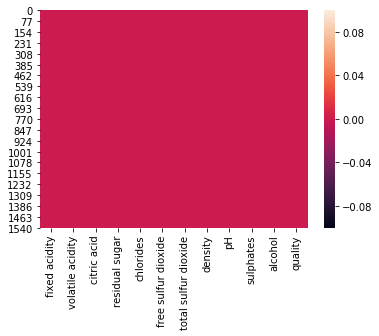

In [6]:
# heatmap of null value
sns.heatmap(rwq.isnull())

In [7]:
# checking the data description
rwq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# corelation between coloums
rwq.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


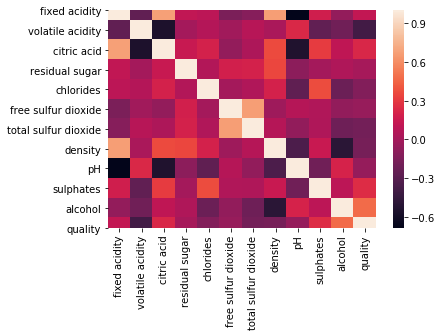

In [9]:
# heat map of corelation
sns.heatmap(rwq.corr())

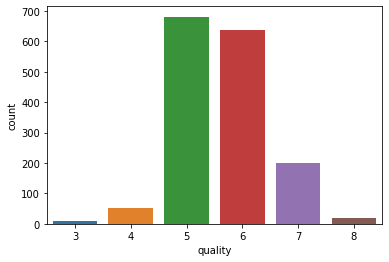

In [10]:
#checking count of diffrent sex
sns.countplot(x=rwq['quality'],data=rwq)

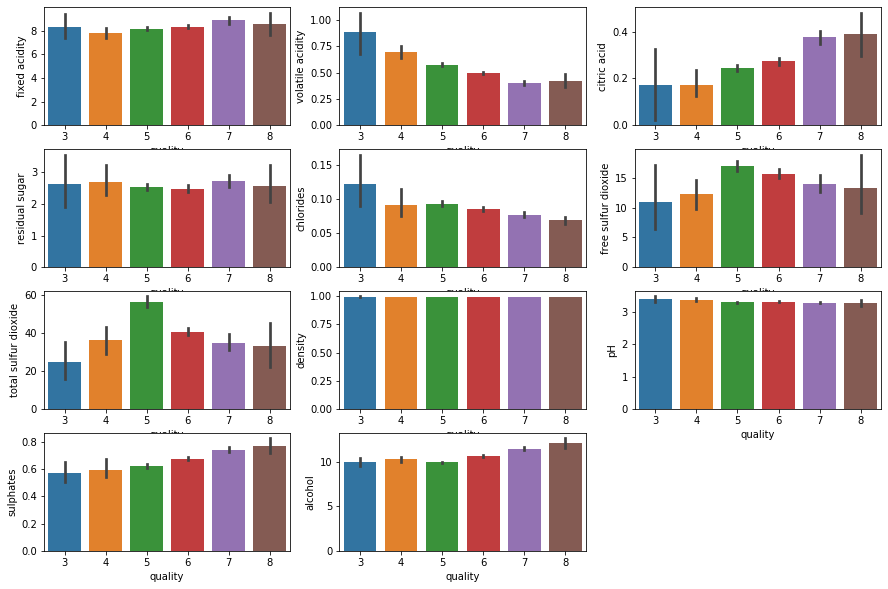

In [11]:
# creating bar plot of every colum with respect to sex to check how other parametr are distributed among gender
figure(num=None, figsize=(15,10))
for column_index, column in enumerate(rwq.columns):
    if column == 'quality':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.barplot(x='quality', y=column, data=rwq)

fixed acidity              AxesSubplot(0.125,0.772143;0.227941x0.107857)
volatile acidity        AxesSubplot(0.398529,0.772143;0.227941x0.107857)
citric acid             AxesSubplot(0.672059,0.772143;0.227941x0.107857)
residual sugar             AxesSubplot(0.125,0.642714;0.227941x0.107857)
chlorides               AxesSubplot(0.398529,0.642714;0.227941x0.107857)
free sulfur dioxide     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.513286;0.227941x0.107857)
density                 AxesSubplot(0.398529,0.513286;0.227941x0.107857)
pH                      AxesSubplot(0.672059,0.513286;0.227941x0.107857)
sulphates                  AxesSubplot(0.125,0.383857;0.227941x0.107857)
alcohol                 AxesSubplot(0.398529,0.383857;0.227941x0.107857)
quality                 AxesSubplot(0.672059,0.383857;0.227941x0.107857)
dtype: object

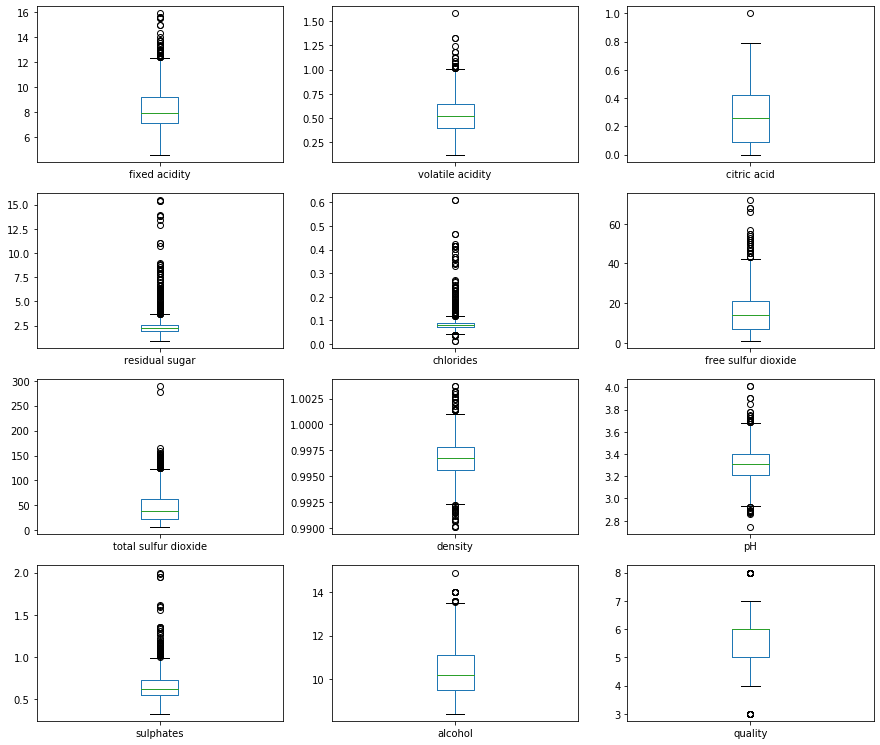

In [12]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
rwq.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

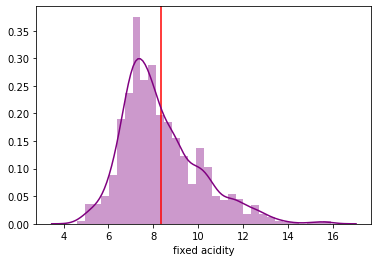

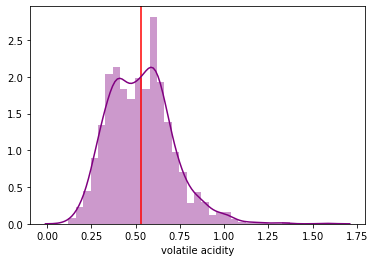

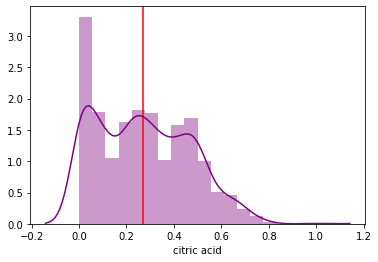

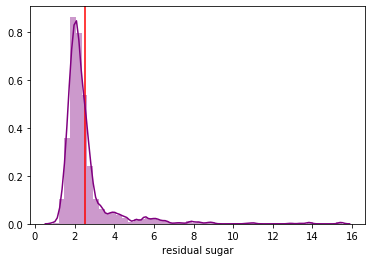

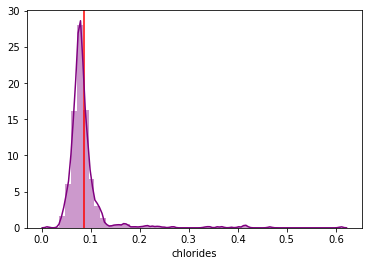

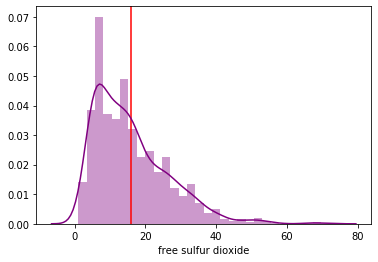

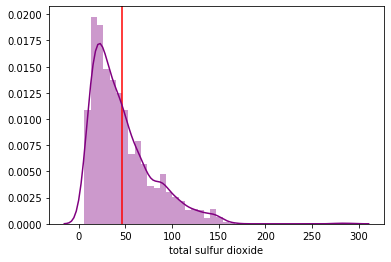

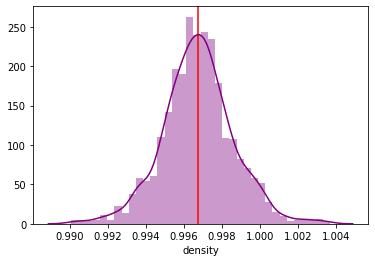

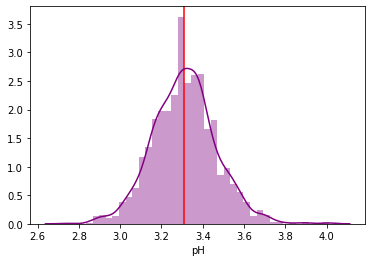

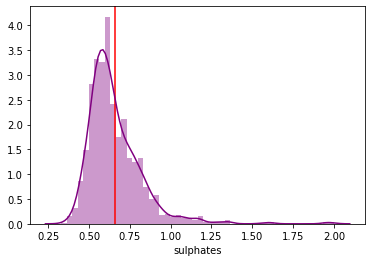

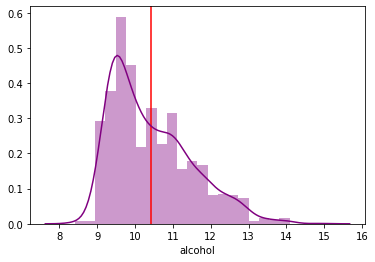

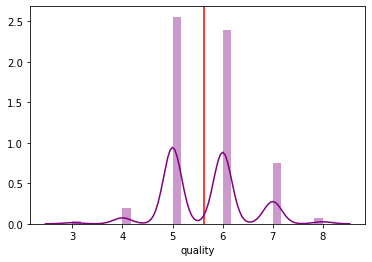

In [13]:
# Histogram - rwqribution plot for all continous variables to visualize skewness
for i,col in enumerate(rwq):
    
    #f, axes = plt.subplots(3, 3)
    plt.figure(i)
    plt.axvline(rwq[col].mean(),color = 'r')
    sns.distplot(rwq[col],color='purple')

In [14]:
# pair plot to see the scatter of data using year as hue for clear understanding
#sns.pairplot(rwq, hue='quality')

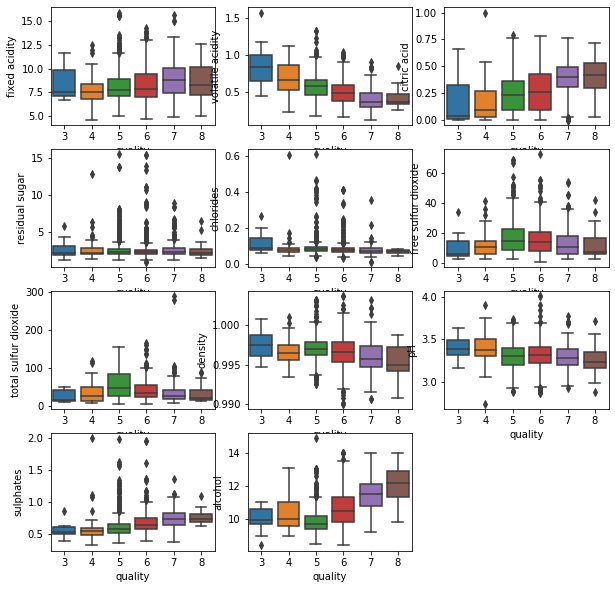

In [15]:
# Creating boxplot of continous varirwqles to visualize the minimum, maximum, avareg value for each colums along with outlires gender wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(rwq.columns):
    if column == 'quality':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='quality', y=column, data=rwq)

In [16]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
rwq['quality'] = pd.cut(rwq['quality'], bins = bins, labels = group_names)
rwq.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1418,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,bad
996,5.6,0.66,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
340,12.2,0.34,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.2,bad
446,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,bad
175,6.9,0.50,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,bad


In [17]:
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
rwq['quality'] = label_quality.fit_transform(rwq['quality'])

In [18]:
#checking skewness
rwq.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [19]:
#removing skewness
for col in rwq.columns:
    if rwq.skew().loc[col]>0.55:
        rwq[col]=np.cbrt(rwq[col])
rwq.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 2.129363
dtype: float64

In [20]:
#removing outlires
z=abs(zscore(rwq))
print(rwq.shape)
rwq=rwq.loc[(z<3).all(axis=1)]
print(rwq.shape)

(1599, 12)
(1488, 12)


In [21]:
# dividing dataset into input values 'x' and output value 'y'
x=rwq.iloc[:,0:-1]
print('x dataset\n',x.sample(3),'\n')
y=rwq.iloc[:,-1]
print('y datase\n',y.sample(3))

x dataset
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1522       1.827160          0.683990         0.25        1.320006   0.414082   
1002       2.087759          0.661911         0.33        1.270334   0.397906   
1450       1.930979          0.717905         0.32        1.259921   0.395789   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1522             2.843867              3.870877  0.99633  3.42   0.989898   
1002             2.351335              3.000000  0.99516  3.26   0.943539   
1450             2.466212              3.036589  0.99470  3.23   0.900411   

       alcohol  
1522  2.196689  
1002  2.270189  
1450  2.244017   

y datase
 1401    0.0
1297    0.0
1561    0.0
Name: quality, dtype: float64


In [22]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [23]:
#creating models array with all the model, along with few blank array for further use
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [24]:
# loop to find out the maximum accuracy of all the model in models array along the range of random state
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [25]:
# loop to find out the cross_val_score of all the model in models array along the range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [26]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
5,GradientBoostingClassifier,0.939597,89
7,RandomForestClassifier,0.936242,46
0,SVC,0.916107,22
4,DecisionTreeClassifier,0.916107,28
8,KNeighborsClassifier,0.912752,27
3,LogisticRegression,0.906040,94
9,QuadraticDiscriminantAnalysis,0.906040,46
1,GaussianNB,0.902685,40
2,SGDClassifier,0.902685,64
6,LinearDiscriminantAnalysis,0.902685,96


In [27]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
0,SVC,0.887820,0.057281
3,LogisticRegression,0.883113,0.062118
7,RandomForestClassifier,0.879095,0.066165
5,GradientBoostingClassifier,0.878392,0.065478
6,LinearDiscriminantAnalysis,0.874352,0.063775
8,KNeighborsClassifier,0.871667,0.056958
9,QuadraticDiscriminantAnalysis,0.866946,0.063993
1,GaussianNB,0.854879,0.063831
2,SGDClassifier,0.848848,0.089738
4,DecisionTreeClassifier,0.832011,0.054221


### Since accuracy obtained by GradientBoostingClassifier is 0.939597 and mean of cross val accuracy is GradientBoostingClassifier 0.878392.

It is quite evident that the diffrence is between accuracy and cross val score is not much for this model, which prove that model is neither under fitted nor over fitted.

Model score is: 0.9680672268907563 

Accuracy score of model is :  0.9395973154362416 

Precision score of model is : 0.84375 

Recall score of model is : 0.675 

Log loss score of model is : 2.08624823186424 

F1_score score of model is : 0.75 

The mean of cross_val_score for themodel is: 0.8925172394539211 

Confusion matrix for themodel is : 
 [[253   5]
 [ 13  27]] 

Classification report for the model is : 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       258
         1.0       0.84      0.68      0.75        40

    accuracy                           0.94       298
   macro avg       0.90      0.83      0.86       298
weighted avg       0.94      0.94      0.94       298
 



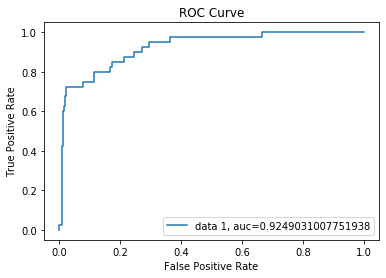

In [28]:
gbc=GradientBoostingClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=89,stratify=y,shuffle=True)
gbc.fit(train_x,train_y)
pred=gbc.predict(test_x)
predict_proba = gbc.predict_proba(test_x)[::,1]
score=cross_val_score(gbc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('Model score is:',gbc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')
print('Confusion matrix for themodel is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 5 Red Wine Quality.csv')

In [30]:
# saving the model using pickle.
joblib.dump(gbc,'gbc_Project 5 Red Wine Quality.pkl')

['gbc_Project 5 Red Wine Quality.pkl']